## Datathon 2020

Date: 15 Feb 2020

__Dubstech__

### Group Members:

1.	Aftab
2.	Srijani
3.  Apurbha
4.	Srinivas

    

- We are analyzing FIFA players attribute datasets for the years 2015 to 2020 collected from the EA Sports Fifa Game series.

- In FIFA, Player Attributes are the data and information that determine the quality and the feature of a player's technical skills, behaviours and performance on the pitch. 

- In FIFA, FUT and FIFA Mobile, each player has a collection of attributes rated from 0 to 99 each. 

- The average of a player's attributes sums up their overall Rating.

- Most of the time we considering the feature "overall" for all our ongoing work


__Importing Required Libraries__

In [1]:
# Basic Libraries

import pandas as pd
import numpy as np 
import os

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Importing data in to respective dataframes

P15 = pd.read_csv("fifa-20-complete-player-dataset/players_15.csv")
P16 = pd.read_csv("fifa-20-complete-player-dataset/players_16.csv")
P17 = pd.read_csv("fifa-20-complete-player-dataset/players_17.csv")
P18 = pd.read_csv("fifa-20-complete-player-dataset/players_18.csv")
P19 = pd.read_csv("fifa-20-complete-player-dataset/players_19.csv")
P20 = pd.read_csv("fifa-20-complete-player-dataset/players_20.csv")
leaguesnteams = pd.read_csv("fifa-20-complete-player-dataset/teams_and_leagues.csv")

## Imputing year in to the datasets 
P15['year'] = 2015
P16['year'] = 2016
P17['year'] = 2017
P18['year'] = 2018
P19['year'] = 2019
P20['year'] = 2020

In [3]:
# merging data 
players = pd.concat([P15, P16 , P17, P18, P19, P20])

__we merged all years dataset to one single dataset__

For growth trends in players and to allow comparison and trend analysis of the same players across the last 6 Years, we considering the observations where the player available in all 6 years only.


In [4]:
players.shape

(100995, 105)

__Data set size after merging all years is 100995__

In [5]:
#sample data set
players.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2015
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2015
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,2015
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,2015


In [6]:
#created a unique column by conactinating name and DOB
players["playerid"] = players["short_name"] + players["dob"]

In [7]:
players2 = players[['year','club',
                    'overall','potential','value_eur','wage_eur',
                    'international_reputation','pace','shooting', 
                    'passing', 'dribbling','defending']]

In [8]:
players2.describe()

,year,overall,potential,value_eur,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending
count,100995.000000,100995.000000,100995.000000,1.009950e+05,100995.000000,100995.000000,89748.000000,89748.000000,89748.000000,89748.000000,89748.00000
mean,2017.615427,65.814308,70.723254,1.890161e+06,9116.688945,1.118986,68.046430,52.237833,56.872220,61.936233,50.96615
std,1.699390,7.104778,6.321098,4.820973e+06,20897.285342,0.398290,11.184736,13.928667,10.688205,10.587017,16.87465
min,2015.000000,40.000000,40.000000,0.000000e+00,0.000000,1.000000,21.000000,14.000000,20.000000,22.000000,14.00000
25%,2016.000000,61.000000,66.000000,1.400000e+05,1000.000000,1.000000,62.000000,42.000000,50.000000,56.000000,35.00000
50%,2018.000000,66.000000,70.000000,5.250000e+05,2000.000000,1.000000,69.000000,54.000000,58.000000,63.000000,55.00000
75%,2019.000000,70.000000,75.000000,1.300000e+06,8000.000000,1.000000,76.000000,63.000000,64.000000,69.000000,65.00000
max,2020.000000,94.000000,95.000000,1.230000e+08,565000.000000,5.000000,97.000000,93.000000,93.000000,96.000000,91.00000


Descriptive stats of the key selected featues ;ike overall, potential, pace, shooting etc

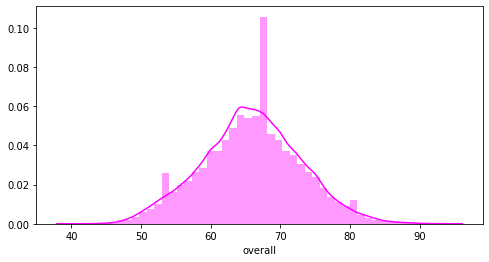

In [9]:
plt.figure(figsize=(8, 4))
sns.distplot(players2['overall'], color='magenta', bins=50, hist_kws={'alpha': 0.4});

Distribution of "overall performance" of the players is normally distributed and so this can be used as output variable when predicting growth of a player based on the team. Mean , Median are almost nearly same .

In [10]:
list(set(players2.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

We have object, integer and floats dataypes in the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D4868D860>,
      dtype=object)

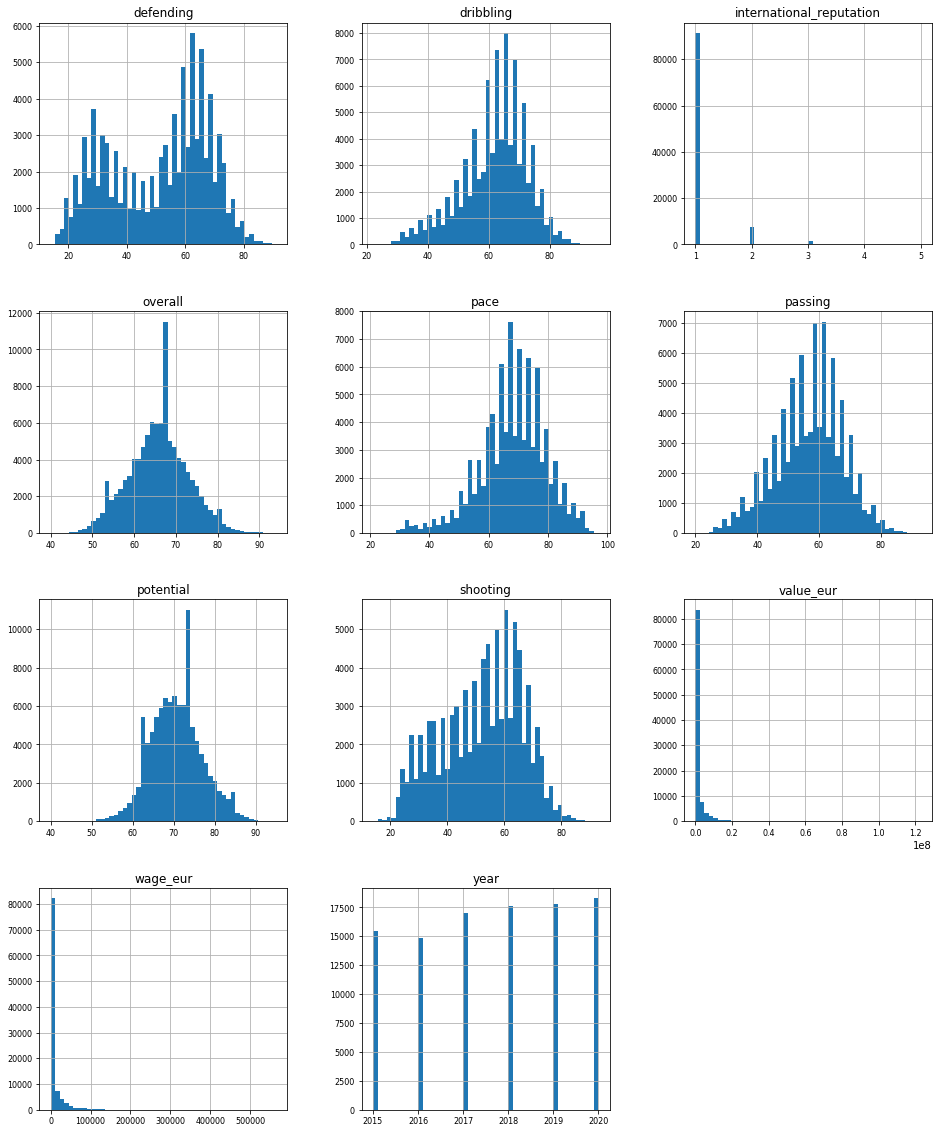

In [11]:
players2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Defending is Bimodal, while over all is normally distributed ,As Overall is combination of all other charecteristics

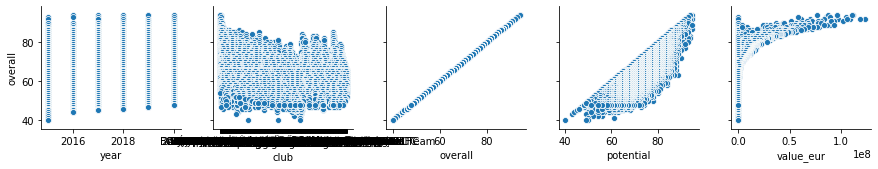

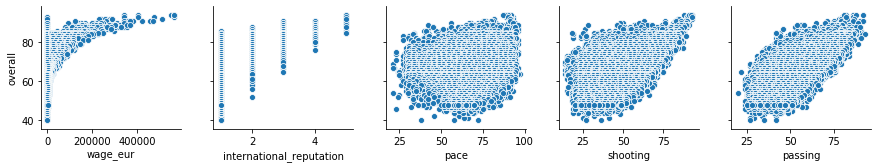

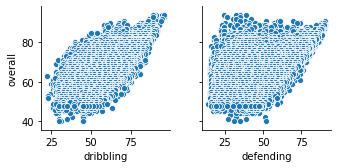

In [12]:
for i in range(0, len(players2.columns), 5):
    sns.pairplot(data=players2,
                x_vars=players2.columns[i:i+5],
                y_vars=['overall'])

When we see the realtion of overall with other charecteristics like pace, shooting, passing etc, There is no straight linear realtion.
Means we have players with all kinsds of skills 

In [13]:
top_ten_countries = players['nationality'].value_counts().head(10).index.values
data = players.loc[players['nationality'].isin(top_ten_countries), :]

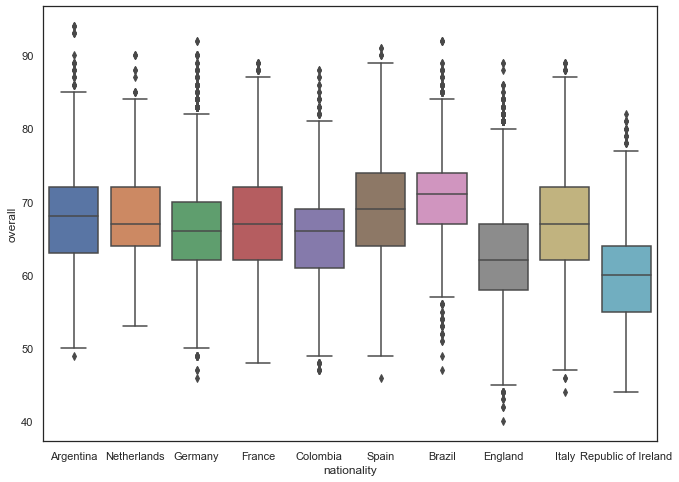

In [14]:
sns.set(style="white")
plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'nationality', y = 'overall', data = data)

Brazil have the highest potential followed closely by Spain, Italy and Argentina

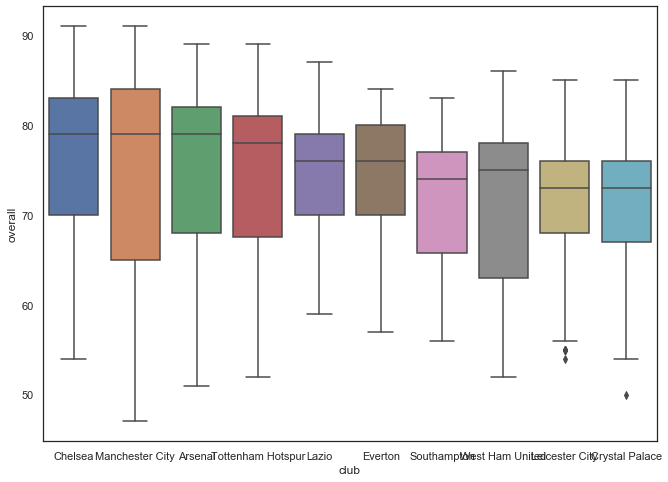

In [15]:
top_ten_clubs = players['club'].value_counts().head(10).index.values
data1 = players.loc[players['club'].isin(top_ten_clubs), :]

sns.set(style="white")
plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'club', y = 'overall', data = data1)

Club Chealsea have more overall and then clubs Arsenal and Machseter City, The club with minimal overall strangth is southhampton.

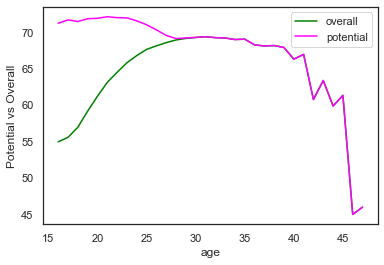

In [16]:
## age factor on the potential

p = sns.lineplot(x = 'age', y = 'overall', ci = None, data = players, label = 'overall', c='green')
p = sns.lineplot(x = 'age', y = 'potential', ci = None, data = players, label = 'potential', c='magenta')
p = plt.ylabel('Potential vs Overall')
p = plt.legend(loc = 1)

Younger players overall is much lesser than their potential , over the age and experience overall matches the potential
as there are very few players with age more than 40

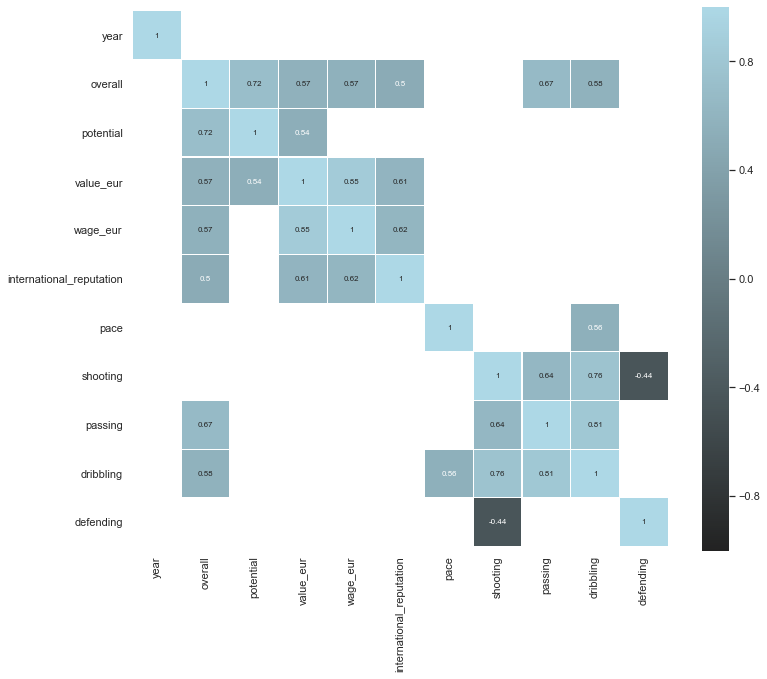

In [17]:
corr = players2.corr() # We already examined SalePrice correlations
pal = sns.dark_palette("lightblue", as_cmap=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap=pal, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True, );

__Most of the contribution of overall performance is from passing and dribbling__

In [18]:
clubs = players2.groupby(['year','club']).agg('mean')

In [19]:
clubs.head()

overall  potential  value_eur  wage_eur  \
year club                                                               
2015 1. FC Heidenheim 1846  61.958333  65.916667        0.0       0.0   
     1. FC Kaiserslautern   64.750000  71.214286        0.0       0.0   
     1. FC Köln             68.964286  74.285714        0.0       0.0   
     1. FC Nürnberg         66.178571  73.142857        0.0       0.0   
     1. FC Union Berlin     63.714286  69.178571        0.0       0.0   

                            international_reputation       pace   shooting  \
year club                                                                    
2015 1. FC Heidenheim 1846                  1.000000  67.952381  50.904762   
     1. FC Kaiserslautern                   1.071429  69.880000  53.760000   
     1. FC Köln                             1.178571  72.416667  56.375000   
     1. FC Nürnberg                         1.178571  72.000000  52.333333   
     1. FC Union Berlin                     1.071429  70.000000  53.440000   

                              passing  dribbling  defending  
year club                                                    
2015 1. FC Heidenheim 1846  51.904762  58.380952  49.285714  
     1. FC Kaiserslautern   56.240000  62.240000  48.120000  
     1. FC Köln             58.625000  66.083333  52.750000  
     1. FC Nürnberg         58.416667  63.875000  49.375000  
     1. FC Union Berlin     55.680000  61.600000  45.320000

In [20]:
clubs2 = clubs.reset_index()

In [21]:
clubs3 = clubs2[['year','club','overall']]

In [22]:
clubs3.head()

,year,club,overall
0,2015,1. FC Heidenheim 1846,61.958333
1,2015,1. FC Kaiserslautern,64.750000
2,2015,1. FC Köln,68.964286
3,2015,1. FC Nürnberg,66.178571
4,2015,1. FC Union Berlin,63.714286


In [23]:
clubs4= pd.pivot_table(clubs3, values = 'overall', index=['club'], columns = 'year').reset_index()

In [24]:
clubs5 = clubs4.dropna()

In [25]:
clubs5.head()

year,club,2015,2016,2017,2018,2019,2020
1,1. FC Heidenheim 1846,61.958333,63.892857,65.360000,66.538462,65.571429,65.793103
2,1. FC Kaiserslautern,64.750000,66.346154,66.518519,64.827586,63.720000,63.750000
3,1. FC Köln,68.964286,71.791667,71.680000,72.285714,70.821429,71.612903
5,1. FC Nürnberg,66.178571,67.384615,67.500000,67.607143,68.714286,68.800000
6,1. FC Union Berlin,63.714286,65.769231,67.642857,68.111111,68.142857,68.787879


In [26]:
clubs5['g16'] = (clubs5[2016]-clubs5[2015])*100/clubs5[2015]
clubs5['g17'] = (clubs5[2017]-clubs5[2016])*100/clubs5[2016]
clubs5['g18'] = (clubs5[2018]-clubs5[2017])*100/clubs5[2017]
clubs5['g19'] = (clubs5[2019]-clubs5[2018])*100/clubs5[2018]
clubs5['g20'] = (clubs5[2020]-clubs5[2019])*100/clubs5[2019]

In [27]:
clubs5.sample(4)

year,club,2015,2016,2017,2018,2019,2020,g16,g17,g18,g19,g20
545,Melbourne Victory,61.904762,63.950000,65.000000,64.888889,64.700000,62.157895,3.303846,1.641908,-0.170940,-0.291096,-3.929065
217,Clube Sport Marítimo,64.933333,67.214286,68.600000,67.833333,69.833333,68.137931,3.512760,2.061637,-1.117590,2.948403,-2.427784
658,RSC Anderlecht,67.962963,71.640000,70.814815,73.000000,70.678571,71.642857,5.410354,-1.151850,3.085774,-3.180039,1.364325
400,Getafe CF,68.653846,71.034483,70.259259,70.645161,72.964286,74.500000,3.467594,-1.091334,0.549254,3.282779,2.104748


In [28]:
clubs6 = clubs5[['club','g16','g17','g18','g19','g20']]
clubs6.sample(4)

year,club,g16,g17,g18,g19,g20
315,FC Girondins de Bordeaux,3.690868,0.943121,1.203266,-1.616328,-0.231900
341,FC Seoul,2.563756,2.045770,-0.107933,-0.432199,-2.387412
666,Rayo Vallecano,4.089993,-0.249875,-1.658489,-0.493374,-1.324935
698,SC Heerenveen,4.617605,0.150000,2.783325,-2.044121,-3.499820


In [29]:
clubs7 = clubs6.melt(id_vars=['club'], var_name='yearly', value_name='growth')

In [30]:
clubs7.head()

,club,yearly,growth
0,1. FC Heidenheim 1846,g16,3.122298
1,1. FC Kaiserslautern,g16,2.465102
2,1. FC Köln,g16,4.099776
3,1. FC Nürnberg,g16,1.822409
4,1. FC Union Berlin,g16,3.225250


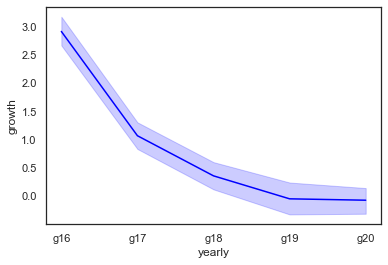

In [31]:
sns.lineplot(data = clubs7, x= 'yearly', y='growth' , color = 'blue')

__We observe that the Year on Year Growth trends in players with respect to teams are falling__

__we can term this as Negative grwoth of players over years__

In [32]:
##To what extent and accuracy can we predict the growth of a player based on the team and league they are a part of?

In [33]:
players3 = players[['year','age','playerid','club','overall']]
top_ten_clubs = players3['club'].value_counts().head(10).index.values
data1 = players3.loc[players3['club'].isin(top_ten_clubs), :]

In [34]:
y= data1[['overall']]
X= data1[['year','age','club']]

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state= 77)
X = pd.concat((X_train , y_train) , axis=1)

In [36]:
import statsmodels.formula.api as smf


In [37]:
model = smf.ols(formula='overall ~ year+age+club', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sat, 15 Feb 2020   Prob (F-statistic):          2.72e-210
Time:                        16:29:12   Log-Likelihood:                -5069.2
No. Observations:                1556   AIC:                         1.016e+04
Df Residuals:                    1544   BIC:                         1.023e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -996.3891    189.060     -5.270      0.000   -1367.231    -625.548
club[T.Chelsea]               0.5246      0.707      0.742      0.458      -0.863       1.912
club[T.Crystal Palace]       -5.8143      0.707     -8.222      0.000      -7.201      -4.427
club[T.Everton]              -2.2857      0.708     -3.230      0.001      -3.674      -0.898
club[T.Lazio]                -2.2586      0.722     -3.129      0.002      -3.675      -0.843
club[T.Leicester City]       -4.8452      0.699     -6.932      0.000      -6.216      -3.474
club[T.Manchester City]      -0.1377      0.704     -0.196      0.845      -1.519       1.243
club[T.Southampton]          -3.6795      0.695     -5.291      0.000      -5.044      -2.315
club[T.Tottenham Hotspur]    -0.0049      0.714     -0.007      0.995      -1.405       1.396
club[T.West Ham United]      -4.0495      0.720     -5.626      0.000      -5.461      -2.638
year                          0.5169      0.094      5.516      0.000       0.333       0.701
age                           1.1792      0.033     35.563      0.000       1.114       1.244
==============================================================================
Omnibus:                       26.659   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.774
Skew:                          -0.323   Prob(JB):                     9.31e-07
Kurtosis:                       2.899   Cond. No.                     2.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we study the model summary statitics , from p-value of each clubs coefficients , 
we can clearly see , the overall strrength does not have singnificant correlation or impact for the top performing clubs like Manchster City and Chelsea

__Now we using the custom prepared dataset with growth as dependant variable__

In [38]:
## Considering the prepared growth data only for the model
top_ten_clubs = players3['club'].value_counts().head(10).index.values
data2 = clubs7.loc[clubs7['club'].isin(top_ten_clubs), :]


In [39]:
y= data2[['growth']]
X= data2[['yearly','club']]

In [40]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state= 77)
X = pd.concat((X_train , y_train) , axis=1)

In [41]:
import statsmodels.formula.api as smf
model = smf.ols(formula='growth ~ yearly+club', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     2.191
Date:                Sat, 15 Feb 2020   Prob (F-statistic):             0.0430
Time:                        16:29:12   Log-Likelihood:                -67.510
No. Observations:                  40   AIC:                             163.0
Df Residuals:                      26   BIC:                             186.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.9297      0.950      2.032      0.052      -0.022       3.882
yearly[T.g17]                -2.1442      0.849     -2.526      0.018      -3.889      -0.400
yearly[T.g18]                -2.5096      0.778     -3.226      0.003      -4.109      -0.910
yearly[T.g19]                -2.2151      0.849     -2.611      0.015      -3.959      -0.471
yearly[T.g20]                -2.1781      0.809     -2.693      0.012      -3.840      -0.516
club[T.Chelsea]               0.9075      1.097      0.827      0.416      -1.347       3.162
club[T.Crystal Palace]       -0.3702      1.165     -0.318      0.753      -2.765       2.025
club[T.Everton]               1.0224      1.169      0.875      0.390      -1.380       3.425
club[T.Lazio]                 0.1872      1.168      0.160      0.874      -2.213       2.587
club[T.Leicester City]        2.4255      1.253      1.936      0.064      -0.150       5.001
club[T.Manchester City]       2.5441      1.276      1.993      0.057      -0.080       5.168
club[T.Southampton]           0.8465      1.097      0.772      0.447      -1.408       3.101
club[T.Tottenham Hotspur]    -0.2607      1.277     -0.204      0.840      -2.886       2.365
club[T.West Ham United]       0.8818      1.097      0.804      0.429      -1.373       3.136
==============================================================================
Omnibus:                        3.709   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                1.662
Skew:                          -0.061   Prob(JB):                        0.436
Kurtosis:                       2.009   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

can we predict the growth of a player based on the team ?

No , we can not as the p-value of correlation among club and growth is much higher than value of significance

### Which club/league is the most suitable for a young player below the age of 25 to play?

In [42]:
youth = players[players.age < 25]

In [43]:
youth.shape

(49365, 106)

In [44]:
youth1 = youth[['club','overall','potential']]

In [45]:
youth1['gap'] = youth1['potential']-youth1['overall']

In [46]:
youth1.head()

,club,overall,potential,gap
6,Chelsea,88,90,2
11,Real Madrid,87,91,4
18,Real Madrid,86,92,6
19,FC Barcelona,86,91,5
20,Chelsea,86,90,4


In [47]:
youth_club = youth1[['club','gap','overall','potential']].groupby(['club']).agg(['mean','std'])['gap']

In [48]:
bestyouthclubs = youth_club.sort_values(['mean','std']).head(10)

In [49]:
bestyouthclubs

,mean,std
club,,
Coritiba,0.300000,0.948683
Botafogo,0.333333,1.000000
Joinville,0.400000,0.894427
Palmeiras,0.625000,0.916125
Santa Cruz,0.666667,0.816497
Internacional,0.714286,1.253566
Cruzeiro,0.750000,1.388730
Chapecoense,0.800000,1.095445
Atlético Mineiro,0.818182,1.401298


__clubs is the most suitable for a young player below the age of 25 is Corbita__

In [50]:
goodclubs = bestyouthclubs.reset_index()['club']
youth2 = youth1.loc[youth1['club'].isin(goodclubs), :]
youth2.head()

,club,overall,potential,gap
1232,Coritiba,77,77,0
1775,Cruzeiro,75,78,3
2063,Coritiba,75,75,0
2067,Palmeiras,75,75,0
2074,Joinville,75,75,0


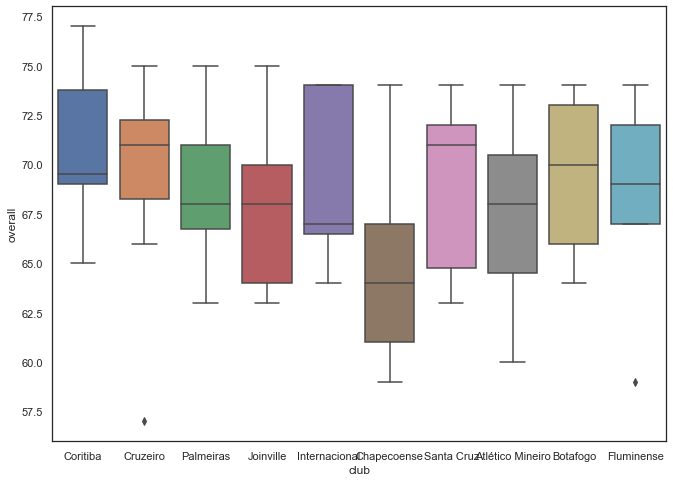

In [51]:
sns.set(style="white")
plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'club', y = 'overall', data = youth2)

In [52]:
import pandasql
from scipy import stats

q31 = pandasql.sqldf("select club, short_name, year, (potential - overall) - last_value(potential - overall) OVER (PARTITION BY club, short_name ORDER BY year ASC ROWS BETWEEN CURRENT ROW AND 1 FOLLOWING) as overall_change from players where age < 25", globals())
q32 = q31[np.abs(stats.zscore(q31["overall_change"])) < 2]
q33 = pandasql.sqldf("select club, year, avg(overall_change) as avg_overall_change, count(*) as cnt from q32 group by club, year", globals())
q34 = q33[np.abs(stats.zscore(q33["cnt"])) < 2]
q35 = pandasql.sqldf("select club, sum(avg_overall_change)/6 as avg_overall_change from q34 group by club", globals())
q36=q35.sort_values("avg_overall_change", ascending = False).head(15)
q36



,club,avg_overall_change
32,Ajax,0.672199
498,Manchester United,0.628042
111,Borussia Mönchengladbach,0.611398
645,SC Freiburg,0.601741
303,FC Nantes,0.596213
278,FC Bayern München,0.595022
723,Sporting CP,0.593590
634,Roma,0.579548
673,SV Werder Bremen,0.570319
399,Hellas Verona,0.563850


Text(0.5, 0, 'potential growth')

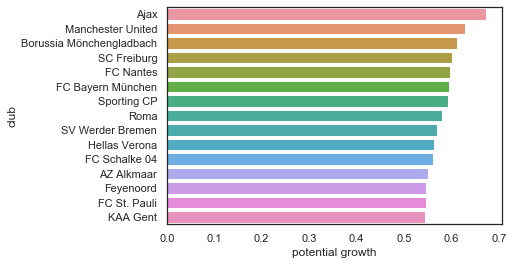

In [53]:
ax = sns.barplot(x='avg_overall_change', y='club', data=q36)
ax.set_xlabel('potential growth')

We have taken potential - overall as metric for this analysis. The idea is if being in a club for a year helps a player to bring the gap between potential - overall down then thats a good club. What we have done is:

1) Get all differences between potential - overall for each payer and each club

2) Get the difference it have moved from 1 year to the next year. Thats the contribution by the club

3) Remove the outlier from the YoY changes

4) Get he average change by year by club and remove the year and clubs where we have less samples.

5) Then get the average by club for last 6 year.

6) If one club have less than 6 years data then the score will be lower


__END__